## Reading and Displaying CSV data

In [1]:
import pandas as pd

data = pd.read_csv('ab_testing.csv')

data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


      User ID Group  Page Views  Time Spent Conversion   Device  \
0       14292     B           3         424         No   Mobile   
1       11682     A           9         342         No   Mobile   
2       19825     A           2         396         No  Desktop   
3       16080     B           4         318         No  Desktop   
4       18851     A           1         338        Yes  Desktop   
...       ...   ...         ...         ...        ...      ...   
4995    16360     B          12         313         No   Mobile   
4996    18084     B          10         313         No  Desktop   
4997    12063     A          11         156         No  Desktop   
4998    18647     B          13         346         No  Desktop   
4999    16686     A          11         208         No  Desktop   

              Location  
0     Northern Ireland  
1             Scotland  
2     Northern Ireland  
3                Wales  
4             Scotland  
...                ...  
4995             Wal

## Filtering Data

In [1]:
# Create filtered DataFrames
data_a = data[data['Group'] == 'A']
data_b = data[data['Group'] == 'B']

# Display both DataFrames
display(data_a)
display(data_b)

      User ID Group  Page Views  Time Spent Conversion   Device  \
1       11682     A           9         342         No   Mobile   
2       19825     A           2         396         No  Desktop   
4       18851     A           1         338        Yes  Desktop   
6       16702     A           5         106         No   Mobile   
10      12776     A          14         351         No  Desktop   
...       ...   ...         ...         ...        ...      ...   
4985    14687     A          12         290         No   Mobile   
4987    16251     A          12         407        Yes  Desktop   
4991    14576     A           7         110         No   Mobile   
4997    12063     A          11         156         No  Desktop   
4999    16686     A          11         208         No  Desktop   

              Location  
1             Scotland  
2     Northern Ireland  
4             Scotland  
6     Northern Ireland  
10               Wales  
...                ...  
4985           Engla

      User ID Group  Page Views  Time Spent Conversion   Device  \
0       14292     B           3         424         No   Mobile   
3       16080     B           4         318         No  Desktop   
5       13134     B           2          93         No  Desktop   
7       10041     B           9         292         No   Mobile   
8       13191     B           8         434         No  Desktop   
...       ...   ...         ...         ...        ...      ...   
4993    14608     B           5          89         No   Mobile   
4994    14255     B          10         258         No  Desktop   
4995    16360     B          12         313         No   Mobile   
4996    18084     B          10         313         No  Desktop   
4998    18647     B          13         346         No  Desktop   

              Location  
0     Northern Ireland  
3                Wales  
5             Scotland  
7     Northern Ireland  
8     Northern Ireland  
...                ...  
4993           Engla


## Descriptive Statistics

In [1]:
# Displaying descriptive statistics
display(data_a.describe())
display(data_b.describe())

            User ID   Page Views   Time Spent
count   2519.000000  2519.000000  2519.000000
mean   14973.893212     7.581580   241.733227
std     2858.061548     4.080066   117.340026
min    10001.000000     1.000000    40.000000
25%    12540.500000     4.000000   137.500000
50%    14902.000000     8.000000   241.000000
75%    17451.000000    11.000000   343.000000
max    19995.000000    14.000000   449.000000

            User ID   Page Views   Time Spent
count   2481.000000  2481.000000  2481.000000
mean   14875.678356     7.492946   243.303910
std     2880.104515     3.963448   119.193552
min    10005.000000     1.000000    40.000000
25%    12367.000000     4.000000   136.000000
50%    14815.000000     8.000000   244.000000
75%    17309.000000    11.000000   348.000000
max    19993.000000    14.000000   449.000000


## Introduction to Histograms

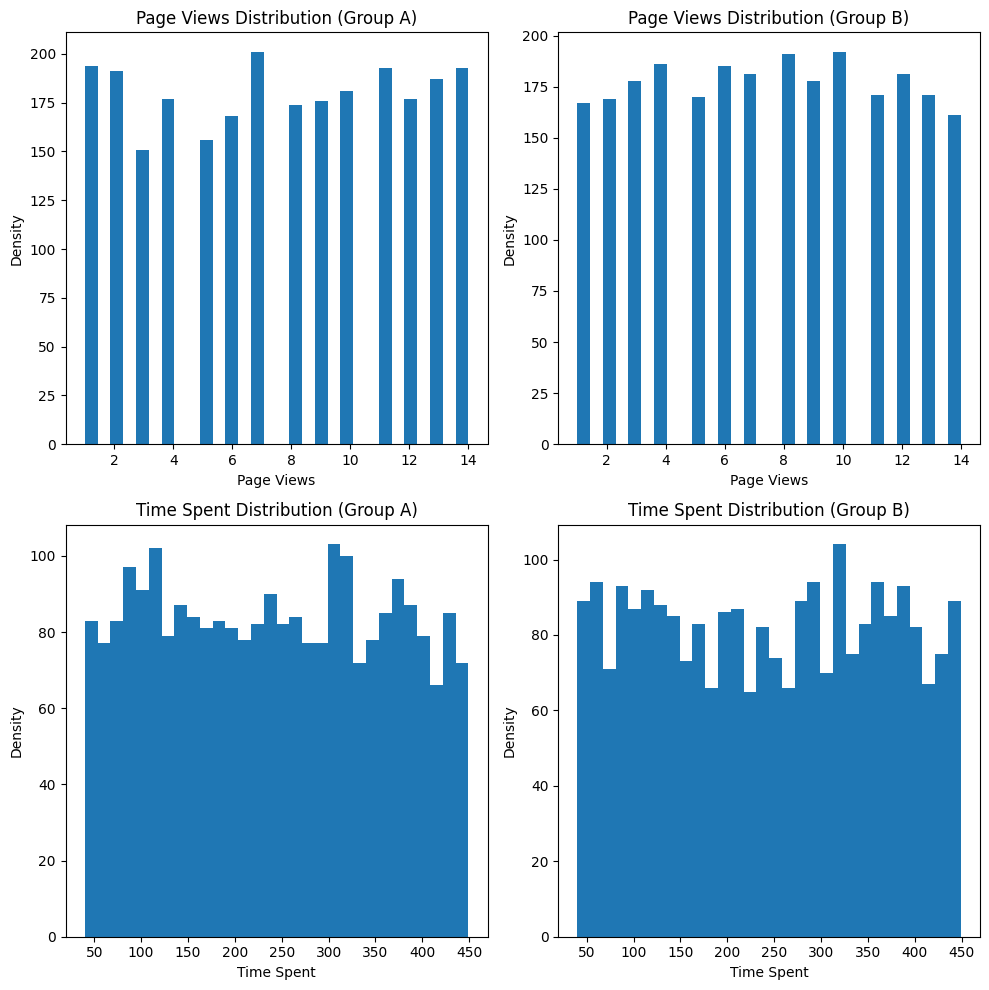

In [1]:
# # Importing the matplotlib.pyplot library as plt
# import matplotlib.pyplot as plt

# # Selecting a column to visualize
# column_aov = data_a["AOV"]

# # Creating a single plot (1x1) of a specific size
# fig, axes = plt.subplots(1, 1, figsize=(16, 5))

# # Initializing the plot title
# axes.set_title(f"{column_aov.name} Distribution")

# # Generating the histogram of a column with 30 bins
# axes.hist(column_aov, bins=30)

# # Labeling the x-axis and y-axis
# axes.set_xlabel(column_aov.name)
# axes.set_ylabel("Density")

# # Rendering and displaying the plot
# plt.show()

# Plotting multiple distributions in one figure
import matplotlib.pyplot as plt

columns = ["Page Views", "Time Spent"]
groups = [("Group A", data_a), ("Group B", data_b)]

# Create a figure with len(columns) rows and 2 columns
fig, axes = plt.subplots(len(columns), 2, figsize=(10, 5 * len(columns)))

for i, col in enumerate(columns):
    for j, (label, df) in enumerate(groups):
        ax = axes[i, j]
        ax.hist(df[col], bins=30)
        ax.set_title(f"{col} Distribution ({label})")
        ax.set_xlabel(col)
        ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

## Theoretical Distribution

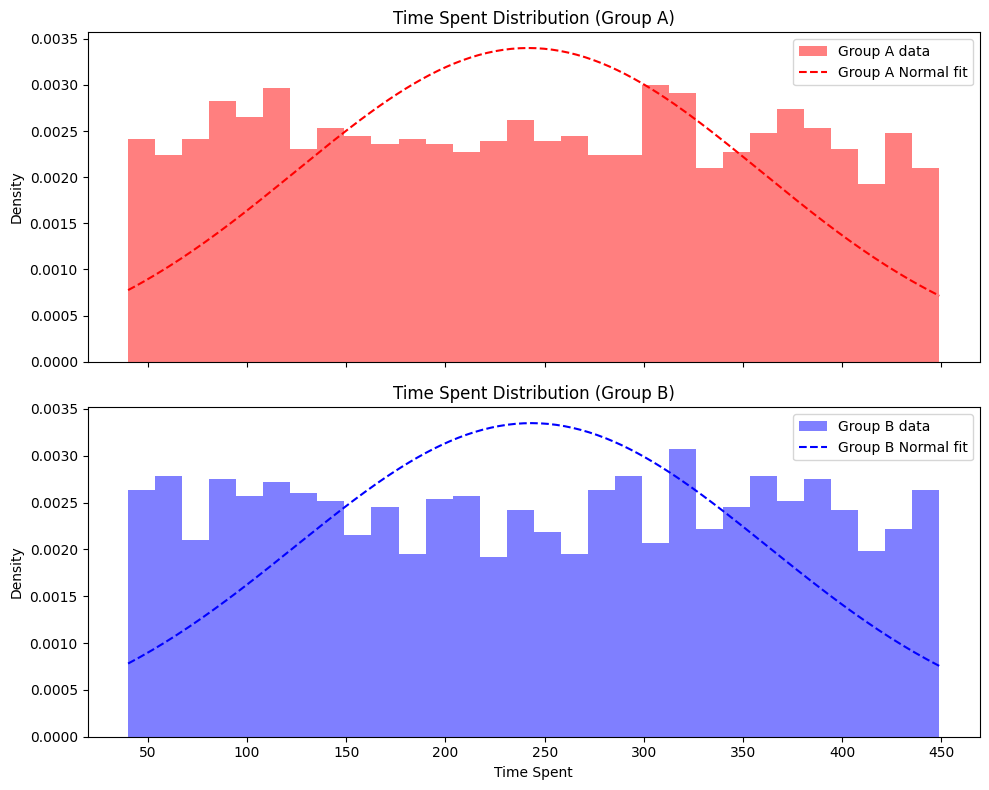

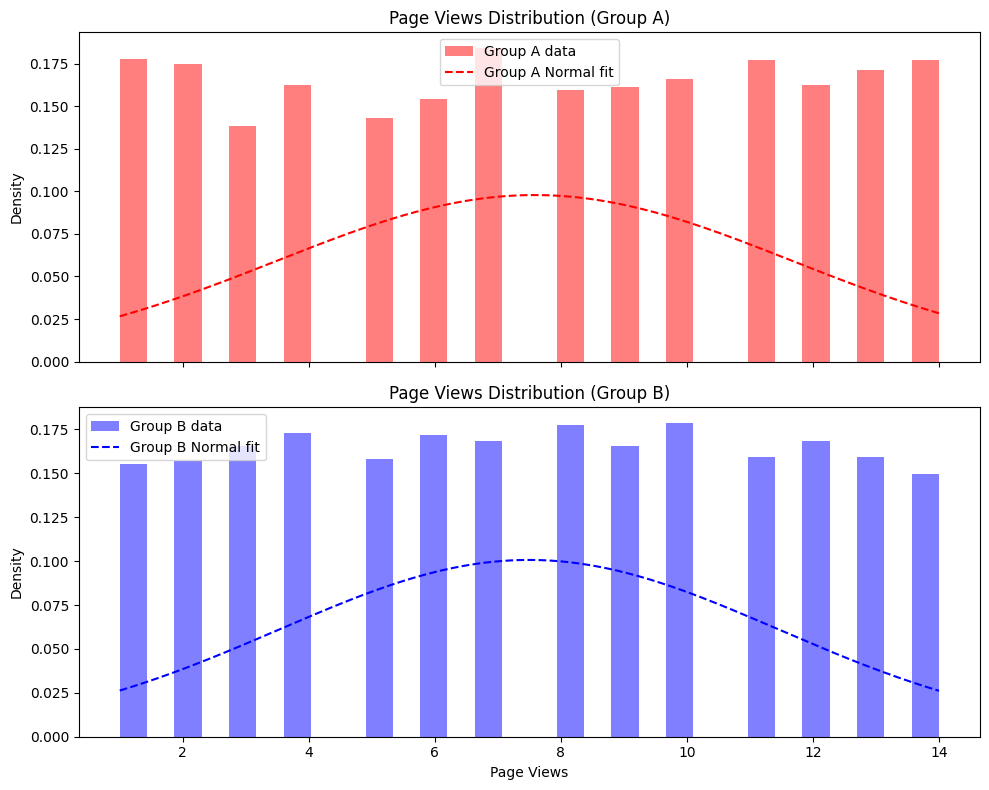

In [1]:
# # Importing mathematical and statistical libraries
# import numpy as np
# from scipy import stats

# # Selecting the column
# column = data_a["Time Spent"]

# # Calculating the theoretical distributions based on the data
# x_values = np.linspace(min(column), max(column), 100)  # Creating a range of values for the x-axis
# distributions = {  # Dictionary with calculated theoretical distributions
#     "Normal": stats.norm.pdf(x_values, *stats.norm.fit(column)),
#     "Exponential": stats.expon.pdf(x_values, *stats.expon.fit(column)),
#     "Uniform": stats.uniform.pdf(x_values, loc=min(column), scale=max(column)-min(column))
# }

# # Specifying the distribution to use
# distribution_name = "Normal"
# distribution = distributions[distribution_name]

# # Plotting
# fig, axes = plt.subplots(1, 1, figsize=(16, 5))  # Creating a single plot
# axes.hist(column, bins=70, alpha=0.5, label=column.name, density=True, color="blue")  # Histogram of the data
# axes.plot(x_values, distribution, label="Theoretical Distribution", color="red")  # Theoretical distribution line
# axes.set_title(f"{distribution_name} Distribution")
# axes.set_xlabel(column.name)
# axes.set_ylabel("Density")
# axes.legend()  # Displaying legend
# plt.show()

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

columns = ["Time Spent", "Page Views"]
groups = [("Group A", data_a), ("Group B", data_b)]

for col in columns:
    data_a_col = data_a[col]
    data_b_col = data_b[col]
    x_min = min(data_a_col.min(), data_b_col.min())
    x_max = max(data_a_col.max(), data_b_col.max())
    x_values = np.linspace(x_min, x_max, 200)
    dist_a = stats.norm.pdf(x_values, *stats.norm.fit(data_a_col))
    dist_b = stats.norm.pdf(x_values, *stats.norm.fit(data_b_col))

    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    # Group A
    axes[0].hist(data_a_col, bins=30, density=True, alpha=0.5, color='r', label="Group A data")
    axes[0].plot(x_values, dist_a, 'r--', label="Group A Normal fit")
    axes[0].set_title(f"{col} Distribution (Group A)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    # Group B
    axes[1].hist(data_b_col, bins=30, density=True, alpha=0.5, color='b', label="Group B data")
    axes[1].plot(x_values, dist_b, 'b--', label="Group B Normal fit")
    axes[1].set_title(f"{col} Distribution (Group B)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

## Outlier Detection

In [1]:
# Creating a function to detect outliers
def detect_outliers(column):
    # Normalizing the data
    transformed_data, _ = stats.boxcox(column + 1)

    # Calculating IQR
    Q1 = np.percentile(transformed_data, 25)
    Q3 = np.percentile(transformed_data, 75)
    IQR = Q3 - Q1

    # Calculating boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detecting outliers
    outlier_indices = column.index[
        (transformed_data < lower_bound) | (transformed_data > upper_bound)
    ]

    return outlier_indices

# Extracting outlier indices
data_a_page_views_outliers = detect_outliers(data_a["Page Views"])
data_a_time_spent_outliers = detect_outliers(data_a["Time Spent"])
data_b_page_views_outliers = detect_outliers(data_b["Page Views"])
data_b_time_spent_outliers = detect_outliers(data_b["Time Spent"])

# Printing outlier quantity
print(f"Number of group A page views outliers: {data_a_page_views_outliers.size}")
print(f"Number of group A time spent outliers: {data_a_time_spent_outliers.size}")
print(f"Number of group B page views outliers: {data_b_page_views_outliers.size}")
print(f"Number of group B time spent outliers: {data_b_time_spent_outliers.size}")

# Printing total outlier count across all four series
total_outliers = (
    data_a_page_views_outliers.size +
    data_b_page_views_outliers.size +
    data_a_time_spent_outliers.size +
    data_b_time_spent_outliers.size
)
print(f"Total count of identified outliers across all columns and groups: {total_outliers}")


Number of group A page views outliers: 0
Number of group A time spent outliers: 0
Number of group B page views outliers: 0
Number of group B time spent outliers: 0
Total count of identified outliers across all columns and groups: 0


## Outlier Removal

In [1]:
# Filtering group A data
data_a_filtered = data_a.drop(data_a_spent_outliers)
data_a_filtered = data_a_filtered.drop(data_a_aov_outliers, errors="ignore")

# Displaying filtered data
display(data_a_filtered)

# Filtering group B data
data_b_filtered = data_b.drop(data_b_spent_outliers)
data_b_filtered = data_b_filtered.drop(data_b_aov_outliers, errors="ignore")

# Displaying filtered data
display(data_b_filtered)

# Calculate removed outliers by row count difference
removed_a = len(data_a) - len(data_a_filtered)
removed_b = len(data_b) - len(data_b_filtered)
total_removed = removed_a + removed_b

print(f"Outliers removed in group A: {removed_a}")
print(f"Outliers removed in group B: {removed_b}")
print(f"Total outliers removed: {total_removed}")

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
0              90.987906              496.88        12.0  47.348084     A
1              50.794390              347.66        14.0  38.614252     A
2              66.206264              161.50        13.0  21.520578     A
3              61.225810               70.91         8.0  11.533441     A
4             122.862188             1014.99        14.0  90.846582     A
...                  ...                 ...         ...        ...   ...
4995          101.266367              100.60        23.0  17.340411     A
4996           53.983563              183.99        14.0  20.652185     A
4997           74.526835              463.80        21.0  32.932672     A
4998           69.242324               23.59        15.0   8.553449     A
4999          173.051784              126.80        24.0  27.007073     A

[4558 rows x 5 columns]

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
5000           68.119998               80.77        17.0  15.306463     B
5001           46.363129              757.89        14.0  98.879776     B
5002           76.004365               34.47        14.0   8.435420     B
5003           70.897366               77.14        14.0  14.927193     B
5005           57.996547               34.09        14.0   6.325083     B
...                  ...                 ...         ...        ...   ...
9995          110.375357               99.26        30.0  22.399053     B
9996          172.102860               52.29        40.0  29.303279     B
9997          134.548224              332.94        27.0  52.063372     B
9998           68.672467              233.74        24.0  28.713010     B
9999          160.964552               13.23        27.0  12.977338     B

[4610 rows x 5 columns]

Outliers removed in group A: 442
Outliers removed in group B: 390
Total outliers removed: 832


## Conducting A/B Test

In [1]:
# # Creating a function that performs an A/B test
# def ab_test(sample_a, sample_b, column_name):
#     # Performing the Mann–Whitney U test
#     _, p = stats.mannwhitneyu(
#         sample_a[column_name],
#         sample_b[column_name],
#         alternative="less"
#     )
    
#     # Interpreting results
#     if p < 0.05:
#         print(f"{column_name}: Group B wins (reject H0)")
#     else:
#         print(f"{column_name}: Group A wins (fail to reject H0)")
        
#     # Printing the p-value
#     print(f"p-value = {p}")

# # Running the test for the AOV column
# ab_test(data_a, data_b, "AOV")

# # Run A/B tests on unfiltered data
# ab_test(data_a, data_b, "Total_Amount_Spent")
# ab_test(data_a, data_b, "AOV")

# # Run A/B tests on filtered data
# ab_test(data_a_filtered, data_b_filtered, "Total_Amount_Spent")
# ab_test(data_a_filtered, data_b_filtered, "AOV")

def mean_confidence_interval(data, confidence=0.95):
    arr = np.array(data)
    m = arr.mean()
    se = stats.sem(arr)
    h = se * stats.t.ppf((1 + confidence) / 2., len(arr) - 1)
    return m, m - h, m + h

def ab_test_with_stats(sample_a, sample_b, column_name, confidence=0.95):
    stat, p = stats.mannwhitneyu(
        sample_a[column_name],
        sample_b[column_name],
        alternative="less"
    )
    # calculate CIs for means
    m_a, lo_a, hi_a = mean_confidence_interval(sample_a[column_name], confidence)
    m_b, lo_b, hi_b = mean_confidence_interval(sample_b[column_name], confidence)
    diff = m_b - m_a
    se_diff = np.sqrt(stats.sem(sample_a[column_name])**2 + stats.sem(sample_b[column_name])**2)
    h_diff = se_diff * stats.t.ppf((1 + confidence) / 2., len(sample_a) + len(sample_b) - 2)
    diff_lo, diff_hi = diff - h_diff, diff + h_diff

    print(f"{column_name}: U-statistic = {stat:.2f}, p-value = {p:.4f}")
    print(f"  Group A mean ({confidence*100:.0f}% CI): {m_a:.2f} ({lo_a:.2f}, {hi_a:.2f})")
    print(f"  Group B mean ({confidence*100:.0f}% CI): {m_b:.2f} ({lo_b:.2f}, {hi_b:.2f})")
    print(f"  Difference (B−A) {confidence*100:.0f}% CI: ({diff_lo:.2f}, {diff_hi:.2f})\n")

# Unfiltered data
ab_test_with_stats(data_a, data_b, "Page Views")
ab_test_with_stats(data_a, data_b, "Time Spent")

# # Filtered data
# ab_test_with_stats(data_a_filtered, data_b_filtered, "AOV")
# ab_test_with_stats(data_a_filtered, data_b_filtered, "Total_Amount_Spent")

Page Views: U-statistic = 3165458.00, p-value = 0.7877
  Group A mean (95% CI): 7.58 (7.42, 7.74)
  Group B mean (95% CI): 7.49 (7.34, 7.65)
  Difference (B−A) 95% CI: (-0.31, 0.13)

Time Spent: U-statistic = 3101095.00, p-value = 0.3210
  Group A mean (95% CI): 241.73 (237.15, 246.32)
  Group B mean (95% CI): 243.30 (238.61, 248.00)
  Difference (B−A) 95% CI: (-4.99, 8.13)

